In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv (r'C:\Users\user\Desktop\Intubed/covid.csv',encoding='ISO-8859-1',parse_dates=[3,4])
df

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-04-05,2020-02-05,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,2020-06-04,2020-01-04,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,2020-04-17,2020-10-04,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,2020-05-13,2020-03-05,9999-99-99,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,2020-07-04,2020-06-04,9999-99-99,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,2020-05-14,2020-01-05,9999-99-99,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,2020-05-31,2020-05-29,9999-99-99,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,97


In [3]:
df.drop(['id','patient_type','pregnancy','contact_other_covid','other_disease'],inplace=True,axis=1)

In [4]:
df['days_prior_to_treatment'] = (df['entry_date'] - df['date_symptoms']).dt.days
df['dead']='1'
df.loc[df['date_died']=='9999-99-99','dead']='0'
df.drop(['entry_date','date_symptoms','date_died'],inplace=True,axis=1)
df = df.astype('float64')

In [5]:
df=df.loc[(df['sex']<=2)&(df['intubed']<=2)&(df['pneumonia']<=2)&(df['diabetes']<=2)&(df['copd']<=2)&(df['asthma']<=2)&(df['inmsupr']<=2)&(df['hypertension']<=2)&(df['cardiovascular']<=2)&(df['obesity']<=2)&(df['renal_chronic']<=2)&(df['tobacco']<=2)&(df['covid_res']<=2)&(df['dead']<=2)&(df['icu']<=2)&(df['days_prior_to_treatment']>=0),['sex','age','inmsupr','pneumonia','diabetes','asthma','copd','hypertension','cardiovascular','renal_chronic','obesity','tobacco','days_prior_to_treatment','covid_res','intubed','icu','dead']]

In [6]:
df.loc[df['sex']==2,'sex']=0
df.loc[df['inmsupr']==2,'inmsupr']=0
df.loc[df['pneumonia']==2,'pneumonia']=0
df.loc[df['diabetes']==2,'diabetes']=0
df.loc[df['asthma']==2,'asthma']=0
df.loc[df['copd']==2,'copd']=0
df.loc[df['hypertension']==2,'hypertension']=0
df.loc[df['cardiovascular']==2,'cardiovascular']=0
df.loc[df['renal_chronic']==2,'renal_chronic']=0
df.loc[df['obesity']==2,'obesity']=0
df.loc[df['tobacco']==2,'tobacco']=0
df.loc[df['intubed']==2,'intubed']=0
df.loc[df['icu']==2,'icu']=0
df.loc[df['covid_res']==2,'covid_res']=0

In [7]:
df

,sex,age,inmsupr,pneumonia,diabetes,asthma,copd,hypertension,cardiovascular,renal_chronic,obesity,tobacco,days_prior_to_treatment,covid_res,intubed,icu,dead
2,1.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,152.0,1.0,0.0,0.0,0.0
4,1.0,60.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,47.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
6,0.0,63.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0
9,1.0,39.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499626,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
499671,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0
499672,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0
499680,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import class_weight
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
import tensorflow as tf
import random as rn

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(1)
rn.seed(2)
tf.random.set_seed(3)

In [9]:
df=df.loc[df['covid_res']==1,['sex','age','inmsupr','pneumonia','diabetes','asthma','copd','hypertension','cardiovascular','renal_chronic','obesity','tobacco','days_prior_to_treatment','covid_res','intubed','icu','dead']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52681 entries, 2 to 220652
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      52681 non-null  float64
 1   age                      52681 non-null  float64
 2   inmsupr                  52681 non-null  float64
 3   pneumonia                52681 non-null  float64
 4   diabetes                 52681 non-null  float64
 5   asthma                   52681 non-null  float64
 6   copd                     52681 non-null  float64
 7   hypertension             52681 non-null  float64
 8   cardiovascular           52681 non-null  float64
 9   renal_chronic            52681 non-null  float64
 10  obesity                  52681 non-null  float64
 11  tobacco                  52681 non-null  float64
 12  days_prior_to_treatment  52681 non-null  float64
 13  covid_res                52681 non-null  float64
 14  intubed              

In [11]:
df.drop(['days_prior_to_treatment'],inplace=True,axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52681 entries, 2 to 220652
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             52681 non-null  float64
 1   age             52681 non-null  float64
 2   inmsupr         52681 non-null  float64
 3   pneumonia       52681 non-null  float64
 4   diabetes        52681 non-null  float64
 5   asthma          52681 non-null  float64
 6   copd            52681 non-null  float64
 7   hypertension    52681 non-null  float64
 8   cardiovascular  52681 non-null  float64
 9   renal_chronic   52681 non-null  float64
 10  obesity         52681 non-null  float64
 11  tobacco         52681 non-null  float64
 12  covid_res       52681 non-null  float64
 13  intubed         52681 non-null  float64
 14  icu             52681 non-null  float64
 15  dead            52681 non-null  float64
dtypes: float64(16)
memory usage: 6.8 MB


In [13]:
df.drop(columns={"covid_res"}, axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52681 entries, 2 to 220652
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             52681 non-null  float64
 1   age             52681 non-null  float64
 2   inmsupr         52681 non-null  float64
 3   pneumonia       52681 non-null  float64
 4   diabetes        52681 non-null  float64
 5   asthma          52681 non-null  float64
 6   copd            52681 non-null  float64
 7   hypertension    52681 non-null  float64
 8   cardiovascular  52681 non-null  float64
 9   renal_chronic   52681 non-null  float64
 10  obesity         52681 non-null  float64
 11  tobacco         52681 non-null  float64
 12  intubed         52681 non-null  float64
 13  icu             52681 non-null  float64
 14  dead            52681 non-null  float64
dtypes: float64(15)
memory usage: 6.4 MB


In [15]:
df = df.reset_index(drop=True)

In [16]:
df['dead'].value_counts().to_frame()

,dead
0.0,33968
1.0,18713


In [17]:
X = df.loc[:, df.columns != 'dead'].values
y = np.array(df['dead'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print("Train X: ", X_train.shape)
print("Train y: ", y_train.shape)
print("Test X: ", X_test.shape)
print("Test y: ", y_test.shape)

Train X:  (36876, 14)
Train y:  (36876,)
Test X:  (15805, 14)
Test y:  (15805,)


In [18]:
ageColumnIndex = df.columns.get_loc('age')

mean = X_train[:,ageColumnIndex].mean(axis=0)
X_train[:,ageColumnIndex] -= mean
std = X_train[:,ageColumnIndex].std(axis=0)
X_train[:,ageColumnIndex] /= std

X_test[:,ageColumnIndex] -= mean
X_test[:,ageColumnIndex] /= std

In [19]:
X_train_oversampled, y_train_oversampled = SMOTE().fit_resample(X_train, y_train)

print("Oversampled train X: ", X_train_oversampled.shape)
print("Oversampled train y: ", y_train_oversampled.shape)


Oversampled train X:  (47484, 14)
Oversampled train y:  (47484,)


In [20]:
acc=[]

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71     10226
         1.0       0.49      0.54      0.51      5579

    accuracy                           0.64     15805
   macro avg       0.61      0.61      0.61     15805
weighted avg       0.65      0.64      0.64     15805

Random Forest acccuracy : 


0.6364441632394812

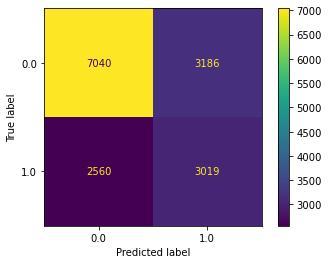

In [21]:
randForestClassifier = RandomForestClassifier(n_estimators=100)
randForestClassifier.fit(X_train_oversampled, y_train_oversampled)

y_pred = randForestClassifier.predict(X_test)

plot_confusion_matrix(randForestClassifier, X_test, y_test)
print(classification_report(y_test, y_pred))
print("Random Forest acccuracy : ")
randForestClassifier.score(X_test,y_test)

In [22]:
acc.append(0.6364)

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73     10226
         1.0       0.50      0.48      0.49      5579

    accuracy                           0.65     15805
   macro avg       0.61      0.61      0.61     15805
weighted avg       0.64      0.65      0.65     15805

KNN acccuracy : 


0.6470737108509965

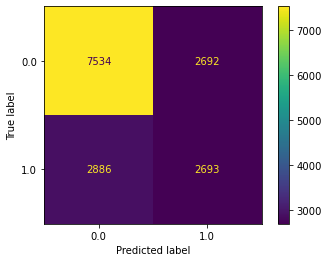

In [23]:
from sklearn.neighbors import KNeighborsClassifier
train_model_KNN = KNeighborsClassifier(n_neighbors=20,weights='distance',p=1,metric='minkowski')
train_model_KNN.fit(X_train_oversampled, y_train_oversampled)
y_pred =train_model_KNN.predict(X_test)
plot_confusion_matrix(train_model_KNN, X_test, y_test)
print(classification_report(y_test, y_pred))
print("KNN acccuracy : ")
train_model_KNN.score(X_test,y_test)

In [24]:
acc.append(0.6470)

              precision    recall  f1-score   support

         0.0       0.78      0.64      0.71     10226
         1.0       0.51      0.68      0.58      5579

    accuracy                           0.65     15805
   macro avg       0.65      0.66      0.64     15805
weighted avg       0.69      0.65      0.66     15805

SVM acccuracy : 


0.6549193293261626

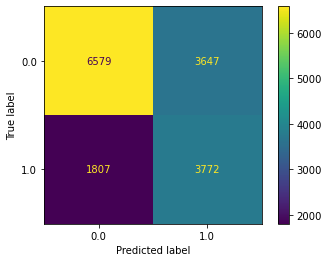

In [25]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train_oversampled, y_train_oversampled) 
y_pred = clf_svm.predict(X_test)
plot_confusion_matrix(clf_svm, X_test, y_test)
print(classification_report(y_test, y_pred))
print("SVM acccuracy : ")
clf_svm.score(X_test,y_test)

In [26]:
acc.append(0.6549)

C:\conda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     10226
         1.0       0.52      0.60      0.55      5579

    accuracy                           0.66     15805
   macro avg       0.64      0.65      0.64     15805
weighted avg       0.67      0.66      0.67     15805

XGB acccuracy : 


0.6608668142992724

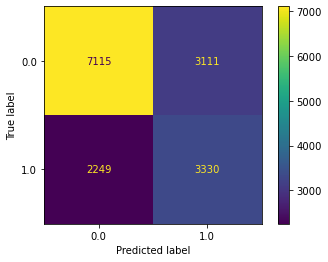

In [27]:
from xgboost import XGBClassifier
train_model_XGB = XGBClassifier()
train_model_XGB.fit(X_train_oversampled, y_train_oversampled)
y_pred =train_model_XGB.predict(X_test)
plot_confusion_matrix(train_model_XGB, X_test, y_test)
print(classification_report(y_test, y_pred))
print("XGB acccuracy : ")
train_model_XGB.score(X_test,y_test)

In [28]:
acc.append(0.6608)

              precision    recall  f1-score   support

         0.0       0.78      0.66      0.71     10226
         1.0       0.51      0.66      0.58      5579

    accuracy                           0.66     15805
   macro avg       0.65      0.66      0.65     15805
weighted avg       0.69      0.66      0.67     15805

LR acccuracy : 


0.6595381208478329

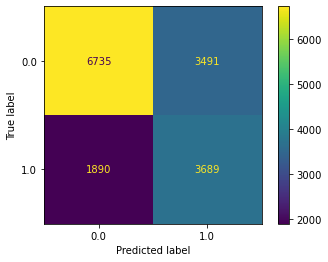

In [29]:
from sklearn.linear_model import LogisticRegression
clf_lr=LogisticRegression(C=0.03, solver='liblinear')
clf_lr.fit(X_train_oversampled,y_train_oversampled)
y_pred = clf_lr.predict(X_test)
plot_confusion_matrix(clf_lr, X_test, y_test)
print(classification_report(y_test, y_pred))
print("LR acccuracy : ")
clf_lr.score(X_test,y_test)

In [30]:
acc.append(0.6595)

In [31]:
df

,sex,age,inmsupr,pneumonia,diabetes,asthma,copd,hypertension,cardiovascular,renal_chronic,obesity,tobacco,intubed,icu,dead
0,1.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,60.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,47.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,63.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,39.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52676,1.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52677,0.0,58.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
52678,0.0,65.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
52679,1.0,29.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
algo_name=['Random Forest','KNN','SVM','XGB', 'Logistic Regression']
acc=np.array(acc)

Text(0, 0.5, 'Accuracy')

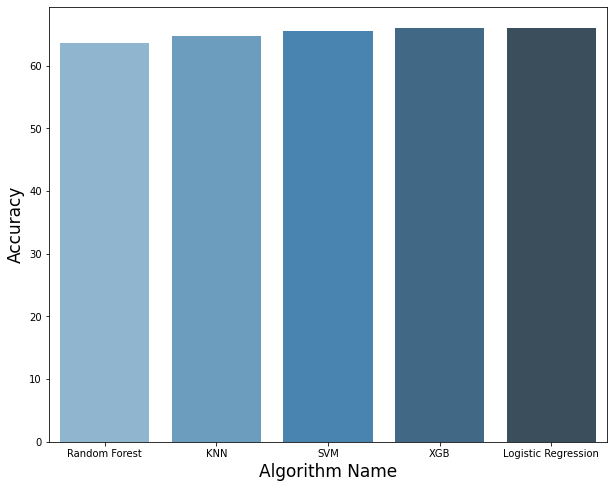

In [33]:
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=acc*100,x=algo_name,estimator=median,palette="Blues_d")
plt.xlabel('Algorithm Name',size=17)

plt.ylabel('Accuracy',size=17)

In [35]:
model = models.Sequential()

model.add(layers.Dense(256, activation = "relu",
                       kernel_regularizer=regularizers.l2(0.001),
                       input_shape = (X_train_new.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation = "relu",
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation = "relu",
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

NameError: name 'X_train_new' is not defined